In [14]:
from scripts.core import Scrapinator
import numpy as np

# 1 - SCRAPPING ET TRAITEMENT DES DONNÉES

In [15]:
scrapinator = Scrapinator(["gonzague", "koumassi"], 2, 10)

 ____    ____  ____      _     ____   ___  _   _     _     _____   ___   ____  
/ ___|  / ___||  _ \    / \   |  _ \ |_ _|| \ | |   / \   |_   _| / _ \ |  _ \ 
\___ \ | |    | |_) |  / _ \  | |_) | | | |  \| |  / _ \    | |  | | | || |_) |
 ___) || |___ |  _ <  / ___ \ |  __/  | | | |\  | / ___ \   | |  | |_| ||  _ < 
|____/  \____||_| \_\/_/   \_\|_|    |___||_| \_|/_/   \_\  |_|   \___/ |_| \_\
                                                                               


Bienvenue dans Scrapinator, le scraper de groupes Facebook pour la récupération d'infos sur les maisons en location!


In [16]:
# executer le script full_script.py avec scrapinator.zone
!python extraction_script.py {scrapinator.zone[0]} {scrapinator.zone[1]} {scrapinator.nb_page_google} {scrapinator.nb_page_fb_group}

extraction_script.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=config["GECKO_DRIVER_PATH"])
 _____ __  __ _____  ____      _      ____  _____   ___   ____  
| ____|\ \/ /|_   _||  _ \    / \    / ___||_   _| / _ \ |  _ \ 
|  _|   \  /   | |  | |_) |  / _ \  | |      | |  | | | || |_) |
| |___  /  \   | |  |  _ <  / ___ \ | |___   | |  | |_| ||  _ < 
|_____|/_/\_\  |_|  |_| \_\/_/   \_\ \____|  |_|   \___/ |_| \_\
                                                                

Processus de recuperation des donnees en cours veuillez patienter ...


Nombre de page a traiter : 2

Nombre de groupes a traiter : 4

Nombre de processeur disponible pour la parallelisation : 
10
/Users/turing/miniforge3/envs/ml/lib/python3.8/site-packages/facebook_scraper/facebook_scraper.py:855: UserWarning: Facebook language detected as fr_FR - for best results, set to en_US
  warnings.warn(
/Users/turing/miniforg

In [17]:
results = scrapinator.transformer()

 _                              __                                 _                
| |_  _ __   __ _  _ __   ___  / _|  ___   _ __  _ __ ___    __ _ | |_   ___   _ __ 
| __|| '__| / _` || '_ \ / __|| |_  / _ \ | '__|| '_ ` _ \  / _` || __| / _ \ | '__|
| |_ | |   | (_| || | | |\__ \|  _|| (_) || |   | | | | | || (_| || |_ | (_) || |   
 \__||_|    \__,_||_| |_||___/|_|   \___/ |_|   |_| |_| |_| \__,_| \__| \___/ |_|   
                                                                                    


Transformation des données en cours...
Dimensions du dataframe : 
(62, 11)


In [18]:
results.head()

,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,0103901766,None,2021,04,08,immeuble,None,gonzague,None,None,https://facebook.com/716175952319410/posts/903...
1,LOYER:125.000f,3,2023,18,02,immeuble,None,koumassi,None,None,https://facebook.com/716175952319410/posts/129...
2,0500309770,None,2023,15,02,None,None,gonzague,None,None,https://facebook.com/716175952319410/posts/129...
3,170000f,2,2023,17,02,None,None,None,None,None,https://facebook.com/716175952319410/posts/129...
4,100,None,2023,17,02,None,None,None,None,None,https://facebook.com/716175952319410/posts/129...


# 2 - TRAITEMENT DES DONNÉES

In [19]:
# importation du module pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# load data
df = pd.read_csv("data/resultat.csv")
print(df.shape)
df.head()

(62, 11)


,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,0103901766,NaN,2021,4,8,immeuble,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/903...
1,LOYER:125.000f,3.0,2023,18,2,immeuble,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...
2,0500309770,NaN,2023,15,2,NaN,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/129...
3,170000f,2.0,2023,17,2,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
4,100,NaN,2023,17,2,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...


In [21]:
# supprimer les lignes ou les colonnes loyer nombre_piece type_logement sont nulles en même temps
df = df.dropna(subset=['loyer', 'nombre_piece', 'type_logement'], how='all')
print(df.shape)
df.head()

(58, 11)


,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,0103901766,NaN,2021,4,8,immeuble,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/903...
1,LOYER:125.000f,3.0,2023,18,2,immeuble,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...
2,0500309770,NaN,2023,15,2,NaN,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/129...
3,170000f,2.0,2023,17,2,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
4,100,NaN,2023,17,2,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...


### 2.1 - Traitement des loyers

In [22]:
# modifier tous les loyers commencant par 0 par NaN
df['loyer'] = df['loyer'].replace(r'^0.*', np.nan, regex=True)

# supprimer LOYER_ de chaines de caractères de la colonne loyer
df['loyer'] = df['loyer'].str.replace('LOYER_', '')

# supprimer LOYER: de chaines de caractères de la colonne loyer
df['loyer'] = df['loyer'].str.replace('LOYER:', '')

# supprimer le caractère _ de la colonne loyer
df['loyer'] = df['loyer'].str.replace('_', '')

# supprimer le caractère . de la colonne loyer
df['loyer'] = df['loyer'].str.replace('.', '')

# supprimer le caratère "f" de la colonne loyer
df['loyer'] = df['loyer'].str.replace('f', '')

# convertir la colonne loyer en numérique et remplacer par NaN les valeurs qui bloquent la conversion
df['loyer'] = pd.to_numeric(df['loyer'], errors='coerce')

# definir le standing en fonction du loyer


/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_79171/4292876857.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['loyer'] = df['loyer'].str.replace('.', '')


In [23]:
# imputer le nombre de pièces par 0, le loyer par 0 le type de logement par "non renseigné",
# le standing par "non renseigné", le quartier par "non renseigné"
df['nombre_piece'] = df['nombre_piece'].fillna(-1)
df['loyer'] = df['loyer'].fillna(-1)
df['nb_loyer'] = df['nb_loyer'].fillna(-1)
df['type_logement'] = df['type_logement'].fillna("indisponible")
df['standing'] = df['standing'].fillna("indisponible")
df['quartier'] = df['quartier'].fillna("indisponible")
df.head()

,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,-1.0,-1.0,2021,4,8,immeuble,indisponible,gonzague,indisponible,-1.0,https://facebook.com/716175952319410/posts/903...
1,125000.0,3.0,2023,18,2,immeuble,indisponible,koumassi,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
2,-1.0,-1.0,2023,15,2,indisponible,indisponible,gonzague,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
3,170000.0,2.0,2023,17,2,indisponible,indisponible,NaN,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
4,100.0,-1.0,2023,17,2,indisponible,indisponible,NaN,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...


In [24]:
df.to_csv("data/final_df.csv", index=False)

# 3 - ANALYSE DES DONNÉES

In [51]:
# loyer moyen par commune dans un dataframe
df[df["commune"] !="indisponible"][df["loyer"] != -1].groupby("commune")["loyer"].mean().sort_values(ascending=False).reset_index().head()

,commune,loyer
0,koumassi,62878.571429


In [52]:
# loyer moyen par commune et par type de logement
df[df["commune"] !="indisponible"][df["loyer"] != -1].groupby(["commune", "type_logement"])["loyer"].mean().sort_values(ascending=False).reset_index().head()

,commune,type_logement,loyer
0,koumassi,immeuble,91250.0
1,koumassi,indisponible,25050.0


/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_79171/2105261890.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="type_logement", y="loyer", data=df[df['loyer'] != -1][df["type_logement"] != "indisponible"], hue="type_logement", palette="Set3")


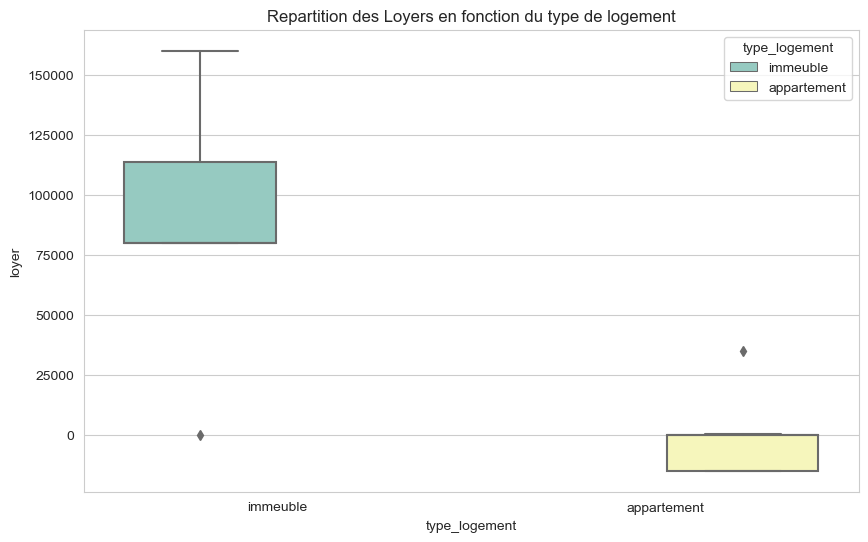

In [43]:
# loyer en fonction du du type de logement skip les lignes ou le loyer est -1 et le type de logement est "indisponible"
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="type_logement", y="loyer", data=df[df['loyer'] != -1][df["type_logement"] != "indisponible"], hue="type_logement", palette="Set3")
plt.title("Repartition des Loyers en fonction du type de logement")
plt.show()

/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_79171/4016193189.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="commune", y="loyer", data=df[df['loyer'] != -1][df["commune"] != "indisponible"], palette="Set3")


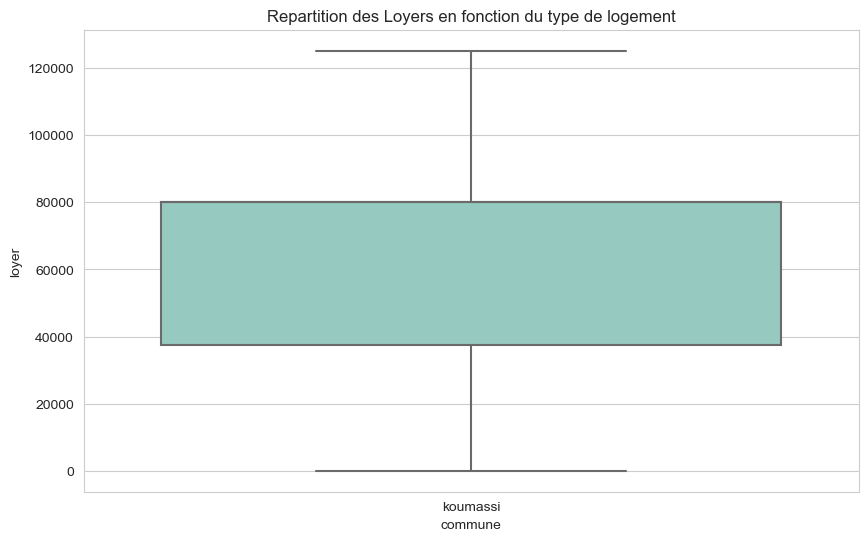

In [44]:
# loyer en fonction de la commune skip les lignes ou le loyer est -1 et la commune est "indisponible"
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="commune", y="loyer", data=df[df['loyer'] != -1][df["commune"] != "indisponible"], palette="Set3")
plt.title("Repartition des Loyers en fonction du type de logement")
plt.show()